In [1]:
# Imports

In [2]:
import numpy as np 
import pandas as pd 
from PIL import Image
import matplotlib.pyplot as plt
import warnings
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras import optimizers


Using TensorFlow backend.


In [3]:
import os
#print(os.listdir(r"C:\Users\paulo\OneDrive\Ambiente de Trabalho\Escola\Apendizagem automatica 2\Trabalho\AA2\input"))
print(os.listdir(r"C:\Users\Nuno\Desktop\trabalhoAA2\input"))
#print(os.listdir("../input"))#Kaggle

['cell_images']


In [4]:
#Ler dados

In [5]:
#caminho_Infected=r"C:\Users\paulo\OneDrive\Ambiente de Trabalho\Escola\Apendizagem automatica 2\Trabalho\AA2\input\cell_images\Parasitized"
#caminho_Uninfected=r"C:\Users\paulo\OneDrive\Ambiente de Trabalho\Escola\Apendizagem automatica 2\Trabalho\AA2\input\cell_images\Uninfected"
caminho_Infected=r"C:\Users\Nuno\Desktop\trabalhoAA2\input\cell_images\Parasitized"
caminho_Uninfected=r"C:\Users\Nuno\Desktop\trabalhoAA2\input\cell_images\Uninfected"
#caminho_Infected=r"../input/cell-images-for-detecting-malaria/cell_images/Parasitized"#Kaggle
#caminho_Uninfected=r"../input/cell-images-for-detecting-malaria/cell_images/Uninfected"#Kaggle

parasitized = os.listdir(caminho_Infected)
uninfected = os.listdir(caminho_Uninfected)

parasitized.remove("Thumbs.db") #
uninfected.remove("Thumbs.db")  # 

tamanho=28 # Tamanho da imagem se tamanho =50 entao resize para 50X50

parasitized_images = []
for p in parasitized:
    
    #img = Image.open(caminho_Infected+"\\"+p)
    img = Image.open(caminho_Infected+"//"+p)#kaggle
    img = img.resize((tamanho,tamanho))
    parasitized_images.append(img)

uninfected_images = []
for u in uninfected:
    #img = Image.open(caminho_Uninfected+"\\"+u)
    img = Image.open(caminho_Uninfected+"//"+u)#Kaggle
    img = img.resize((tamanho,tamanho))
    uninfected_images.append(img)

In [6]:
#Preparar os dados

In [7]:
### juntar as duas pastas de imagens na variavel x
x_array = np.empty((len(parasitized_images)+len(uninfected_images), tamanho, tamanho, 3))
x_array = x_array.astype(int)
index = 0
for i in range(x_array.shape[0]):
    if i < len(parasitized_images):
        x_array[i] = np.array(parasitized_images[i])
    else:
        x_array[i] = np.array(uninfected_images[index])
        index += 1

# criar variavel y
y_array = np.append(np.ones(len(parasitized_images)), np.zeros(len(uninfected_images)))
y_array = to_categorical(y_array, num_classes = 2)


# dar split ao dataset para ter variaveis de treino e de teste
test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, random_state = 42, test_size = test_size)
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (22046, 28, 28, 3)
x_test shape:  (5512, 28, 28, 3)
y_train shape:  (22046, 2)
y_test shape:  (5512, 2)


In [8]:
#graficos

In [9]:
def print_history_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

In [10]:
# Mlp

(22046, 28, 28, 3)
(22046, 2352)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2352)              5534256   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4706      
Total params: 5,538,962
Trainable params: 5,538,962
Non-trainable params: 0
_________________________________________________________________
None
Train on 22046 samples, validate on 5512 samples
Epoch 1/50
 - 82s - loss: 0.6541 - accuracy: 0.6247 - val_loss: 0.6085 - val_accuracy: 0.6704
Epoch 2/50
 - 82s - loss: 0.6062 - accuracy: 0.6689 - val_loss: 0.5927 - val_accuracy: 0.6899
Epoch 3/50
 - 83s - loss: 0.5871 - accuracy: 0.6859 - val_loss: 0.5903 - val_accuracy: 0.6909
Epoch 4/50
 - 82s - loss: 0.5802 - accuracy: 0.6959 - val_loss: 0.5921 - val_accuracy: 0.6840
Epoch 5/50
 - 83s - loss: 0.5747 - accuracy

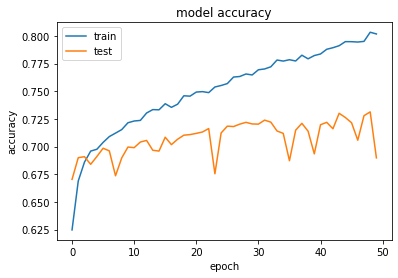

In [11]:

def model_mlp(num_pixels):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal',
                    activation='relu'))

    model.add(Dense(2, kernel_initializer='normal', activation='softmax'))
    opt= optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

def mlp(x_train,y_train,x_test,y_test):
    num_pixels=x_train.shape[1] * x_train.shape[2]*x_train.shape[3]
    print(x_train.shape)
    x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
    x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')
    print(x_train.shape)

    x_train = x_train / 255
    x_test = x_test / 255

    model = model_mlp(num_pixels)
    print(model.summary())
    history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32,
                      verbose=2)
    print_history_accuracy(history)
    scores = model.evaluate(x_test, y_test, verbose=0)
    return history, scores;
    
history,scores=mlp(x_train,y_train,x_test,y_test)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
Scores:  [0.584310364134945, 0.6897677779197693]
Erro modelo MLP: 31.02%


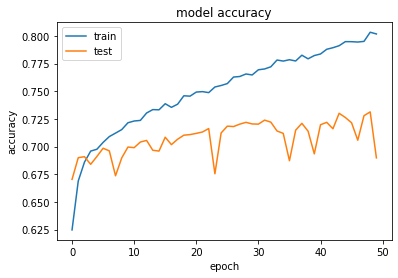

In [12]:
print_history_accuracy(history)
print('Scores: ', scores)
print("Erro modelo MLP: %.2f%%" % (100-scores[1]*100))